In [1]:
import pandas as pd
from astropy.io import fits
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
from astropy.table import Table, Column
import astroML
%matplotlib inline

In [2]:
#Pandas#
#data = fits.getdata('HLC.RA_00_to_01.fits.gz', 1)
#table = pd.DataFrame(data)

#Table#
table1 = Table.read('HLC.RA_00_to_01.fits.gz')
table2 = Table.read('HLC.RA_01_to_02.fits.gz')
table3 = Table.read('HLC.RA_02_to_03.fits.gz')
table4 = Table.read('HLC.RA_03_to_04.fits.gz')
table5 = Table.read('HLC.RA_20_to_21.fits.gz')
table6 = Table.read('HLC.RA_21_to_22.fits.gz')
table7 = Table.read('HLC.RA_22_to_23.fits.gz')
table8 = Table.read('HLC.RA_23_to_24.fits.gz')
#pandas_df = table.to_pandas()
table1.colnames



['LC_NAME',
 'IAU_NAME',
 'N_GOOD_EPOCHS',
 'MEAN_PSFMAG',
 'MEAN_PSFMAG_ERR',
 'MEAN_EXPMAG',
 'MEAN_EXPMAG_ERR',
 'RMS_PSFMAG',
 'RMS_EXPMAG',
 'CHISQ_PSFMAG',
 'CHISQ_EXPMAG',
 'N_GOOD_EPOCHS_PSF_CLIP',
 'N_GOOD_EPOCHS_EXP_CLIP',
 'MEAN_PSFMAG_CLIP',
 'MEAN_PSFMAG_ERR_CLIP',
 'MEAN_EXPMAG_CLIP',
 'MEAN_EXPMAG_ERR_CLIP',
 'RMS_PSFMAG_CLIP',
 'RMS_EXPMAG_CLIP',
 'CHISQ_PSFMAG_CLIP',
 'CHISQ_EXPMAG_CLIP',
 'MEAN_PSFMAG_ITER',
 'MEAN_PSFMAG_ERR_ITER',
 'MEAN_EXPMAG_ITER',
 'MEAN_EXPMAG_ERR_ITER',
 'PERCENTILE_05_PSF',
 'PERCENTILE_50_PSF',
 'PERCENTILE_95_PSF',
 'PERCENTILE_05_EXP',
 'PERCENTILE_50_EXP',
 'PERCENTILE_95_EXP',
 'TIME_SPAN',
 'MEAN_OBJECT_TYPE',
 'MEAN_CHILD',
 'REDDENING',
 'RA_MEAN',
 'RA_MEAN_ERR',
 'RA_PM',
 'RA_PM_ERR',
 'RA_MEAN_CLIP',
 'RA_MEAN_ERR_CLIP',
 'RA_PM_CLIP',
 'RA_PM_ERR_CLIP',
 'RA_CHISQ_CON',
 'RA_CHISQ_CON_CLIP',
 'RA_CHISQ_LIN',
 'RA_CHISQ_LIN_CLIP',
 'DEC_MEAN',
 'DEC_MEAN_ERR',
 'DEC_PM',
 'DEC_PM_ERR',
 'DEC_MEAN_CLIP',
 'DEC_MEAN_ERR_CLIP',
 'DEC

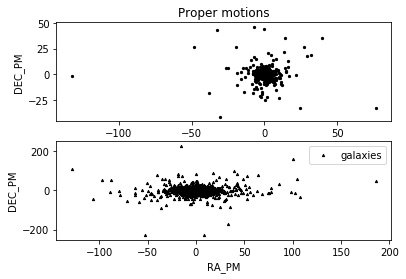

In [46]:
#-----Create mask to separate stars and galaxies-----------#
stars=np.where(table1['MEAN_OBJECT_TYPE']>5)[0]
galaxies=np.where(table1['MEAN_OBJECT_TYPE']<5)[0]
rapm=table1['RA_PM']
decpm=table1['DEC_PM']
countss=np.array(range(len(stars)))
countsg=np.array(range(len(galaxies)))

#----stars proper motion-------#
plt.figure()
plt.subplot(211)
plt.title('Proper motions')
plt.xlabel('RA_PM')
plt.ylabel('DEC_PM')
plt.scatter(rapm[stars], decpm[stars], s=5, label='stars', color='k')
plt.subplot(212)
plt.xlabel('RA_PM')
plt.ylabel('DEC_PM')
plt.scatter(rapm[galaxies], decpm[galaxies], s=5, marker='^', label='galaxies', color='k')
plt.legend()
plt.savefig('pmHLC1.png')
plt.show()





In [74]:
u=table1['MEAN_PSFMAG'][:,0]
g=table1['MEAN_PSFMAG'][:,1]
r=table1['MEAN_PSFMAG'][:,2]
i=table1['MEAN_PSFMAG'][:,3]
z=table1['MEAN_PSFMAG'][:,4]
#ugriz
z

<Column name='MEAN_PSFMAG' dtype='float32' length=446842>
20.9605
20.6475
 20.022
18.2704
18.2732
19.5776
16.1084
    0.0
 20.128
19.5461
20.3303
    0.0
    ...
20.1447
20.6859
20.8155
20.1723
20.3094
20.4395
20.5598
 20.488
20.4021
20.9058
   20.7
19.6628

In [71]:
countss=np.array(range(len(stars)))

293465

In [4]:
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
import numpy as np
from matplotlib import pyplot as plt
import scipy
%matplotlib notebook

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=True)


stars=np.where(table1['MEAN_OBJECT_TYPE']>5)[0]
galaxies=np.where(table1['MEAN_OBJECT_TYPE']<5)[0]
rapm=table1['RA_PM']
decpm=table1['DEC_PM']
countss=np.array(range(len(stars)))
countsg=np.array(range(len(galaxies)))
#colors ugriz#
u=table1['MEAN_PSFMAG'][:,0]
g=table1['MEAN_PSFMAG'][:,1]
r=table1['MEAN_PSFMAG'][:,2]
i=table1['MEAN_PSFMAG'][:,3]
z=table1['MEAN_PSFMAG'][:,4]
N, xedges, yedges = binned_statistic_2d(g-i, r, rapm[stars],
                                        'count', bins=100)

ModuleNotFoundError: No module named 'scipy'

In [6]:
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
import numpy as np
from matplotlib import pyplot as plt
%matplotlib notebook

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=True)

#------------------------------------------------------------

# get the desired data
#logg = data['logg']
#Teff = data['Teff']
#FeH = data['FeH']

#-----Create mask to separate stars and galaxies-----------#
stars=np.where(table1['MEAN_OBJECT_TYPE']>5)[0]
galaxies=np.where(table1['MEAN_OBJECT_TYPE']<5)[0]
rapm=table1['RA_PM']
decpm=table1['DEC_PM']
countss=np.array(range(len(stars)))
countsg=np.array(range(len(galaxies)))
#colors ugriz#
u=table1['MEAN_PSFMAG'][:,0]
g=table1['MEAN_PSFMAG'][:,1]
r=table1['MEAN_PSFMAG'][:,2]
i=table1['MEAN_PSFMAG'][:,3]
z=table1['MEAN_PSFMAG'][:,4]

#------------------------------------------------------------
# Plot the results using the binned_statistic function
from astroML.stats import binned_statistic_2d
N, xedges, yedges = binned_statistic_2d(g-i, r, rapm[stars],
                                        'count', bins=100)
FeH_mean, xedges, yedges = binned_statistic_2d(Teff, logg, count,
                                               'median', bins=100)

# Define custom colormaps: Set pixels with no sources to white
cmap = plt.cm.copper
cmap.set_bad('w', 1.)

cmap_multicolor = plt.cm.jet
cmap_multicolor.set_bad('w', 1.)

# Create figure and subplots
fig = plt.figure(figsize=(10, 5))
fig.subplots_adjust(wspace=0.22, left=0.1, right=0.95,
                    bottom=0.12, top=0.95)

#--------------------
# First axes:
ax = plt.subplot(131, xticks=[4000, 5000, 6000, 7000, 8000])
plt.imshow(np.log10(N.T), origin='lower',
           extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]],
           aspect='auto', interpolation='nearest', cmap=cmap)
plt.xlim(xedges[-1], xedges[0])
plt.ylim(yedges[-1], yedges[0])
plt.xlabel(r'$\mathrm{T_{eff}}$')
plt.ylabel(r'$\mathrm{log(g)}$')

cb = plt.colorbar(ticks=[0, 1, 2, 3], pad=0.2,
                  format=r'$10^{%i}$', orientation='horizontal')
cb.set_label(r'$\mathrm{number\ in\ pixel}$')
plt.clim(0, 3)

#--------------------
# Second axes:
ax = plt.subplot(132, xticks=[4000, 5000, 6000, 7000, 8000])
plt.imshow(FeH_mean.T, origin='lower',
           extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]],
           aspect='auto', interpolation='nearest', cmap=cmap)
plt.xlim(xedges[-1], xedges[0])
plt.ylim(yedges[-1], yedges[0])
plt.xlabel(r'$\mathrm{T_{eff}}$')

cb = plt.colorbar(ticks=np.arange(-2.5, 1, 1), pad=0.2,
                  format=r'$%.1f$', orientation='horizontal')
cb.set_label(r'$\mathrm{mean\ [Fe/H]\ in\ pixel}$')
plt.clim(-2.5, 0.5)

# Draw density contours over the colors
levels = np.linspace(0, np.log10(N.max()), 7)[2:]
plt.contour(np.log10(N.T), levels, colors='k',
            extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])

#--------------------
# Third axes:
ax = plt.subplot(133, xticks=[4000, 5000, 6000, 7000, 8000])
plt.imshow(FeH_mean.T, origin='lower',
           extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]],
           aspect='auto', interpolation='nearest', cmap=cmap_multicolor)
plt.xlim(xedges[-1], xedges[0])
plt.ylim(yedges[-1], yedges[0])
plt.xlabel(r'$\mathrm{T_{eff}}$')

cb = plt.colorbar(ticks=np.arange(-2.5, 1, 1), pad=0.2,
                  format=r'$%.1f$', orientation='horizontal')
cb.set_label(r'$\mathrm{mean\ [Fe/H]\ in\ pixel}$')
plt.clim(-2.5, 0.5)

# Draw density contours over the colors
levels = np.linspace(0, np.log10(N.max()), 7)[2:]
plt.contour(np.log10(N.T), levels, colors='k',
            extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])

plt.savefig('mltest.png')
plt.show()

ModuleNotFoundError: No module named 'scipy'

In [80]:
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
import numpy as np
from matplotlib import pyplot as plt
%matplotlib notebook

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=True)

#------------------------------------------------------------
# Get SDSS SSPP data
from astroML.datasets import fetch_sdss_sspp
data = fetch_sdss_sspp()

ModuleNotFoundError: No module named 'astroML'

[========================================]  37.46Mb / 37.46Mb   


/Users/BriBri/miniconda3/envs/astroconda36/lib/python3.6/site-packages/astroML/stats/_binned_statistic.py:323: RuntimeWarning: invalid value encountered in true_divide
  result[a] /= flatcount


<IPython.core.display.Javascript object>


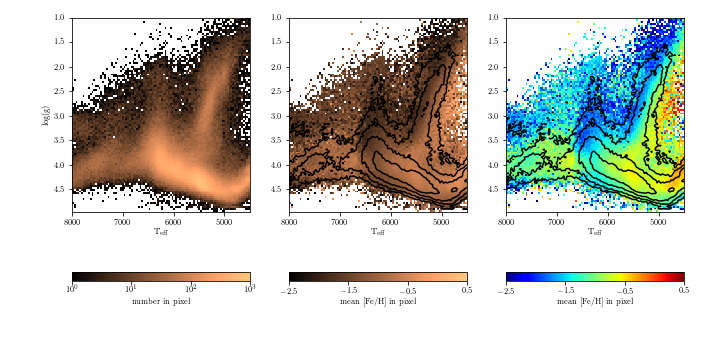

/Users/BriBri/miniconda3/envs/astroconda36/lib/python3.6/site-packages/ipykernel_launcher.py:57: RuntimeWarning: divide by zero encountered in log10
/Users/BriBri/miniconda3/envs/astroconda36/lib/python3.6/site-packages/ipykernel_launcher.py:87: RuntimeWarning: divide by zero encountered in log10
/Users/BriBri/miniconda3/envs/astroconda36/lib/python3.6/site-packages/ipykernel_launcher.py:107: RuntimeWarning: divide by zero encountered in log10


In [10]:
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
import numpy as np
from matplotlib import pyplot as plt
%matplotlib notebook

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=True)

#------------------------------------------------------------
# Get SDSS SSPP data
from astroML.datasets import fetch_sdss_sspp
data = fetch_sdss_sspp()

# do some reasonable magnitude cuts
rpsf = data['rpsf']
data = data[(rpsf > 15) & (rpsf < 19)]

# get the desired data
logg = data['logg']
Teff = data['Teff']
FeH = data['FeH']

#------------------------------------------------------------
# Plot the results using the binned_statistic function
from astroML.stats import binned_statistic_2d
N, xedges, yedges = binned_statistic_2d(Teff, logg, FeH,
                                        'count', bins=100)
FeH_mean, xedges, yedges = binned_statistic_2d(Teff, logg, FeH,
                                               'mean', bins=100)

# Define custom colormaps: Set pixels with no sources to white
cmap = plt.cm.copper
cmap.set_bad('w', 1.)

cmap_multicolor = plt.cm.jet
cmap_multicolor.set_bad('w', 1.)

# Create figure and subplots
fig = plt.figure(figsize=(10, 5))
fig.subplots_adjust(wspace=0.22, left=0.1, right=0.95,
                    bottom=0.12, top=0.95)

#--------------------
# First axes:
ax = plt.subplot(131, xticks=[4000, 5000, 6000, 7000, 8000])
plt.imshow(np.log10(N.T), origin='lower',
           extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]],
           aspect='auto', interpolation='nearest', cmap=cmap)
plt.xlim(xedges[-1], xedges[0])
plt.ylim(yedges[-1], yedges[0])
plt.xlabel(r'$\mathrm{T_{eff}}$')
plt.ylabel(r'$\mathrm{log(g)}$')

cb = plt.colorbar(ticks=[0, 1, 2, 3], pad=0.2,
                  format=r'$10^{%i}$', orientation='horizontal')
cb.set_label(r'$\mathrm{number\ in\ pixel}$')
plt.clim(0, 3)

#--------------------
# Second axes:
ax = plt.subplot(132, xticks=[4000, 5000, 6000, 7000, 8000])
plt.imshow(FeH_mean.T, origin='lower',
           extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]],
           aspect='auto', interpolation='nearest', cmap=cmap)
plt.xlim(xedges[-1], xedges[0])
plt.ylim(yedges[-1], yedges[0])
plt.xlabel(r'$\mathrm{T_{eff}}$')

cb = plt.colorbar(ticks=np.arange(-2.5, 1, 1), pad=0.2,
                  format=r'$%.1f$', orientation='horizontal')
cb.set_label(r'$\mathrm{mean\ [Fe/H]\ in\ pixel}$')
plt.clim(-2.5, 0.5)

# Draw density contours over the colors
levels = np.linspace(0, np.log10(N.max()), 7)[2:]
plt.contour(np.log10(N.T), levels, colors='k',
            extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])

#--------------------
# Third axes:
ax = plt.subplot(133, xticks=[4000, 5000, 6000, 7000, 8000])
plt.imshow(FeH_mean.T, origin='lower',
           extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]],
           aspect='auto', interpolation='nearest', cmap=cmap_multicolor)
plt.xlim(xedges[-1], xedges[0])
plt.ylim(yedges[-1], yedges[0])
plt.xlabel(r'$\mathrm{T_{eff}}$')

cb = plt.colorbar(ticks=np.arange(-2.5, 1, 1), pad=0.2,
                  format=r'$%.1f$', orientation='horizontal')
cb.set_label(r'$\mathrm{mean\ [Fe/H]\ in\ pixel}$')
plt.clim(-2.5, 0.5)

# Draw density contours over the colors
levels = np.linspace(0, np.log10(N.max()), 7)[2:]
plt.contour(np.log10(N.T), levels, colors='k',
            extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])

plt.savefig('mltest.png')
plt.show()

In [5]:
import scipy

ModuleNotFoundError: No module named 'scipy'

In [7]:
!pip install scipy


  Using cached scipy-1.0.0-cp36-cp36m-macosx_10_6_intel.macosx_10_9_intel.macosx_10_9_x86_64.macosx_10_10_intel.macosx_10_10_x86_64.whl


In [9]:
!pip install sklearn

    100% |████████████████████████████████| 7.6MB 75kB/s eta 0:00:011
  Running setup.py bdist_wheel for sklearn ... done
  Stored in directory: /Users/BriBri/Library/Caches/pip/wheels/d7/db/a3/1b8041ab0be63b5c96c503df8e757cf205c2848cf9ef55f85e
Successfully built sklearn


<IPython.core.display.Javascript object>


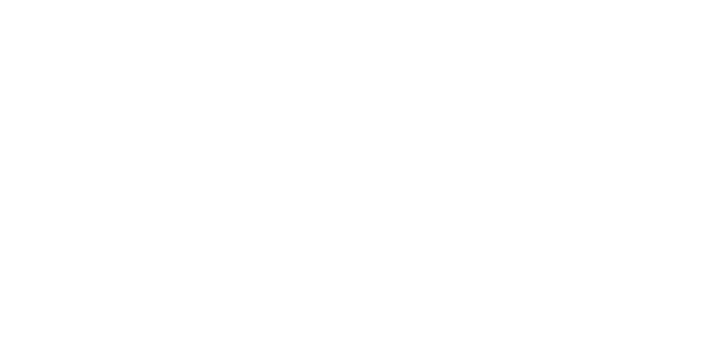

In [20]:
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
import numpy as np
from matplotlib import pyplot as plt
%matplotlib notebook

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=True)

#------------------------------------------------------------

# get the desired data
#logg = data['logg']
#Teff = data['Teff']
#FeH = data['FeH']

#-----Create mask to separate stars and galaxies-----------#
stars=np.where(table1['MEAN_OBJECT_TYPE']>5)[0]
galaxies=np.where(table1['MEAN_OBJECT_TYPE']<5)[0]
rapm=table1['RA_PM']
decpm=table1['DEC_PM']
countss=np.array(range(len(stars)))
countsg=np.array(range(len(galaxies)))
#colors ugriz#
u=table1['MEAN_PSFMAG'][:,0]
g=table1['MEAN_PSFMAG'][:,1]
r=table1['MEAN_PSFMAG'][:,2]
i=table1['MEAN_PSFMAG'][:,3]
z=table1['MEAN_PSFMAG'][:,4]

#------------------------------------------------------------
# Plot the results using the binned_statistic function
from astroML.stats import binned_statistic_2d
N, xedges, yedges = binned_statistic_2d((g-i)[stars], r[stars], (g-i)[stars],
                                        'count', bins=100)
pm_median, xedges, yedges = binned_statistic_2d((g-i)[stars], r[stars], rapm[stars],
                                               'median', bins=100)

# Define custom colormaps: Set pixels with no sources to white
cmap = plt.cm.copper
cmap.set_bad('w', 1.)

cmap_multicolor = plt.cm.jet
cmap_multicolor.set_bad('w', 1.)

# Create figure and subplots
fig = plt.figure(figsize=(10, 5))
fig.subplots_adjust(wspace=0.22, left=0.1, right=0.95,
                    bottom=0.12, top=0.95)

In [18]:
plt.imshow(N.T)
plt.colorbar()

In [16]:
plt.show()

<IPython.core.display.Javascript object>


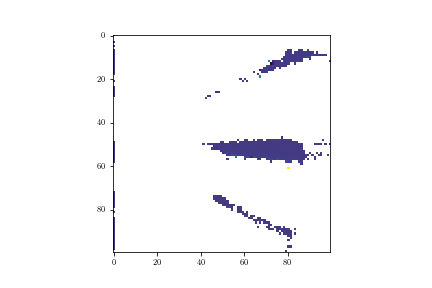

In [21]:
plt.imshow(pm_median)

<IPython.core.display.Javascript object>


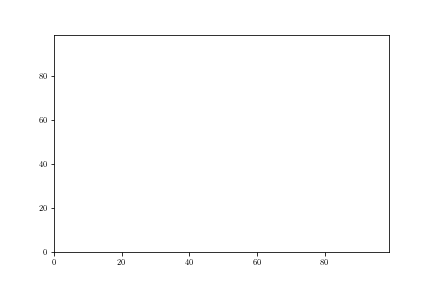

In [26]:
plt.contour(pm_median, levels=[1,2,3])

In [28]:
pprint(pm_median)

Pretty printing has been turned OFF


In [29]:
pm_median

array([[  0.,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       ..., 
       [  0.,  nan,  nan, ...,  nan,  nan,  nan],
       [  0.,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan]])